In [1]:
import pandas as pd
import numpy as np
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [2]:
dataset = pd.read_csv("keystrokes.csv") 

In [3]:
TRAIN, TEST = 0.9, 0.1

x = dataset.iloc[:, 3:34]

y = dataset.iloc[:, 0:1]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=TRAIN, test_size=TEST)

x_train, x_test, y_train, y_test = np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(18360, 31) (18360, 1) (2040, 31) (2040, 1)


In [4]:
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train).toarray()

print(y_train.shape)

(18360, 51)


In [5]:
ACTIVATION = "relu"

model = Sequential()
model.add(Dense(16, input_dim=31, activation=ACTIVATION))
model.add(Dense(16, activation=ACTIVATION))
model.add(Dense(51, activation="softmax"))

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
EPOCHS = 300
BATCH_SIZE = 50
VALIDATION_SPLIT = 0.1

model.compile(loss='CategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT)

Epoch 1/300
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0254 - loss: 3.8689 - val_accuracy: 0.0528 - val_loss: 3.6372
Epoch 2/300
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0904 - loss: 3.5226 - val_accuracy: 0.1961 - val_loss: 3.2874
Epoch 3/300
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2255 - loss: 3.1784 - val_accuracy: 0.2642 - val_loss: 3.0099
Epoch 4/300
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3069 - loss: 2.8814 - val_accuracy: 0.3519 - val_loss: 2.7649
Epoch 5/300
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3698 - loss: 2.6584 - val_accuracy: 0.3883 - val_loss: 2.5542
Epoch 6/300
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4127 - loss: 2.4600 - val_accuracy: 0.4161 - val_loss: 2.3855
Epoch 7/300
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4490 - loss: 2.3015 - val_accuracy: 0.4450 - val_loss: 2.2445
Epoch 8/300
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4785 - loss: 2.1499 - val_accu

In [7]:
y_test = ohe.transform(y_test).toarray()

score, acc = model.evaluate(x_test, y_test, verbose=1)

print("Test score: ", score)
print("Test accuracy: ", acc)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8710 - loss: 0.4951
Test score:  0.49717751145362854
Test accuracy:  0.8627451062202454


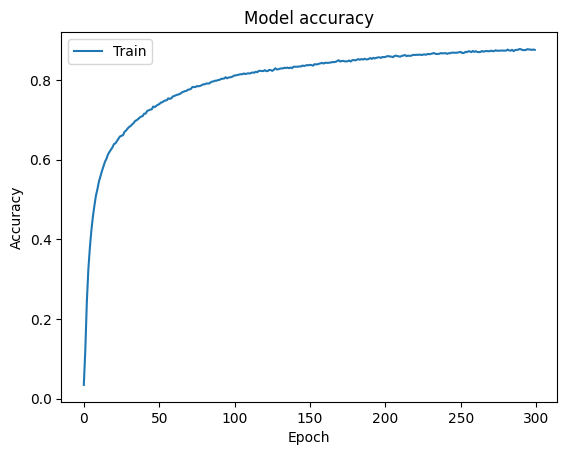

In [8]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
EER: 0.02896078431372549


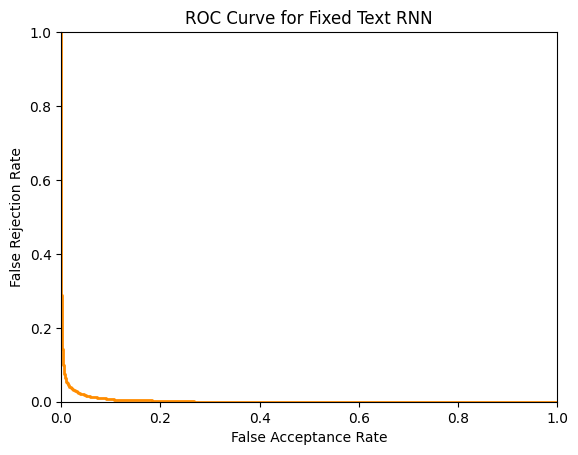

In [9]:
y_pred = model.predict(x_test)
y_pred = y_pred.ravel()
y_test = y_test.ravel()

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

fnr = 1 - tpr
differences = np.absolute(fnr - fpr)
eer = fpr[np.argmin(differences)]

print('EER:', eer)

plt.figure()
plt.plot(fpr, fnr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Acceptance Rate')
plt.ylabel('False Rejection Rate')
plt.title('ROC Curve for Fixed Text RNN')
plt.show()
